In [19]:
# Step 1: importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [20]:
# step 2: read the dataset
pth_to_data = '../Data/house_data/data.csv'
data = pd.read_csv(pth_to_data)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


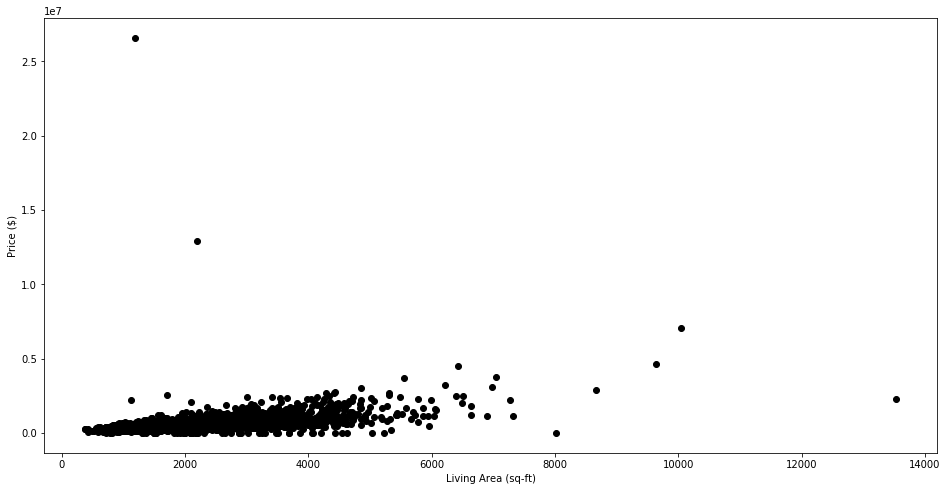

In [21]:
# let's consider the effect of living area size on price
# plotting the data to see correlation
plt.figure(figsize=(16, 8))
plt.scatter(
    data['sqft_living'],
    data['price'],
    c='black'
)
plt.xlabel("Living Area (sq-ft)")
plt.ylabel("Price ($)")
plt.show()

In [22]:
x = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

print(np.shape(x))

reg = linear_model.LinearRegression()
reg.fit(x, y)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

(4600, 1)
The linear model is: Y = 1.2954e+04 + 251.95X


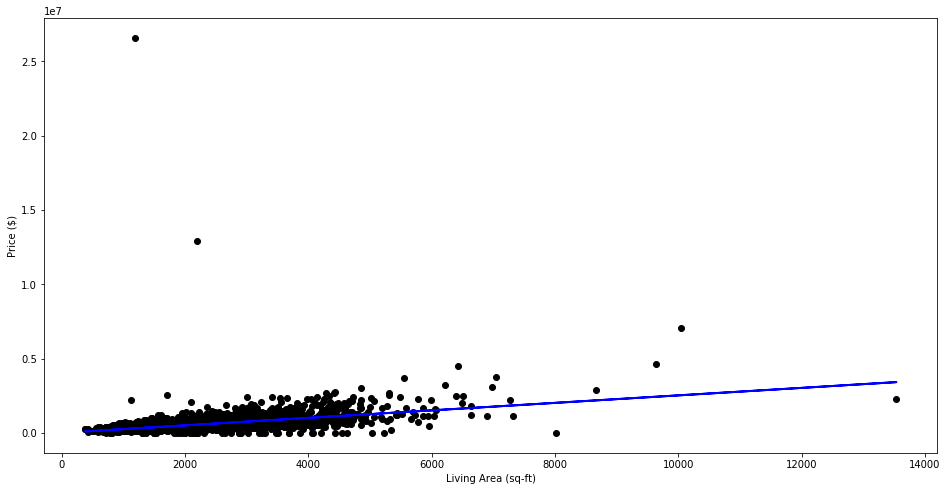

In [23]:
# plot of the regression line
predictions = reg.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['sqft_living'],
    data['price'],
    c='black'
)
plt.plot(
    data['sqft_living'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Living Area (sq-ft)")
plt.ylabel("Price ($)")
plt.show()

In [24]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, predictions))

Coefficients: 
 [[251.95013106]]
Mean squared error: 258959628843.37
Coefficient of determination: 0.19


In [26]:
X = data['sqft_living']
y = data['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1045.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          7.55e-207
Time:                        19:16:34   Log-Likelihood:                -66971.
No. Observations:                4600   AIC:                         1.339e+05
Df Residuals:                    4598   BIC:                         1.340e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.295e+04   1.83e+04      0.709      

/home/hashim/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
